# 1.7 Network graph visualization

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import os
import matplotlib.pyplot as plt
from pyvis.network import Network
import seaborn as sns
import pyvis

In [3]:
# Import relationship data

relationship_df = pd.read_csv('countries_relationship.csv', index_col = 0)

In [5]:
relationship_df

,source,target,value
0,France,Russia,12
1,Germany,Russia,32
2,Germany,Italy,27
3,Austria,Germany,11
4,France,Poland,11
5,France,Germany,31
6,Germany,Poland,28
7,Germany,Lithuania,5
8,Finland,Lithuania,12
9,Finland,Germany,5


In [7]:
# Create a graph from a pandas dataframe

G = nx.from_pandas_edgelist(relationship_df, 
                            source = "source", 
                            target = "target", 
                            edge_attr = "value", 
                            create_using = nx.Graph())

# Graph visualization - Networkx

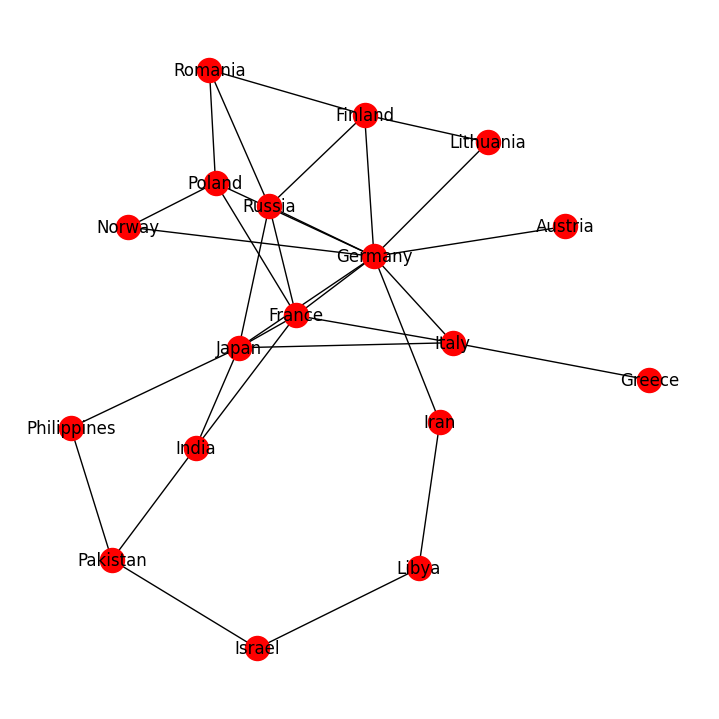

In [9]:
h = plt.figure(figsize = (7,7))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels = True, node_color = 'red', edge_cmap = plt.cm.Blues, pos = pos)
plt.show() 

In [17]:
h.savefig('networkx_plt_countries.png')

# Graph visualization - pyvis

In [15]:
# Define net object

net = Network()
net = Network(notebook = True,width="900px", height="800px", bgcolor='#222222', font_color='white')

# Define nodes from the G object
node_degree = dict(G.degree)

# Setting up node size attributes
nx.set_node_attributes(G, node_degree, 'size')
net.from_nx(G)
net.show_buttons(filter_ = True)
net.repulsion()
net.show("countries.html")

countries.html


# Community detection - Leiden algorithm

In [19]:
from cdlib import algorithms
coms = algorithms.leiden(G)

Note: to be able to use all crisp methods, you need to install some additional packages:  {'infomap', 'graph_tool', 'bayanpy', 'wurlitzer'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'pyclustering', 'ASLPAw'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'infomap', 'wurlitzer'}


In [21]:
type(coms)

cdlib.classes.node_clustering.NodeClustering

In [23]:
new_com = coms.to_node_community_map()

In [25]:
new_com

defaultdict(list,
            {'Russia': [0],
             'Germany': [0],
             'Austria': [0],
             'Poland': [0],
             'Lithuania': [0],
             'Finland': [0],
             'Norway': [0],
             'Romania': [0],
             'France': [1],
             'Italy': [1],
             'Japan': [1],
             'India': [1],
             'Greece': [1],
             'Philippines': [2],
             'Pakistan': [2],
             'Israel': [2],
             'Libya': [2],
             'Iran': [2]})

In [27]:
# Put the output from new_com into a dictionary

dict_com = {k:v[0] for k,v in new_com.items()}

In [29]:
dict_com

{'Russia': 0,
 'Germany': 0,
 'Austria': 0,
 'Poland': 0,
 'Lithuania': 0,
 'Finland': 0,
 'Norway': 0,
 'Romania': 0,
 'France': 1,
 'Italy': 1,
 'Japan': 1,
 'India': 1,
 'Greece': 1,
 'Philippines': 2,
 'Pakistan': 2,
 'Israel': 2,
 'Libya': 2,
 'Iran': 2}

In [31]:
# Rerun network graph with the communities as an argument

nx.set_node_attributes(G, dict_com, 'group')
com_net = Network(notebook = True, width="1300px", height="700px", bgcolor='#222222', font_color='white')
com_net.from_nx(G)
com_net.show_buttons(filter_ = True)
com_net.repulsion()
com_net.show("countries_communities_leiden.html")

countries_communities_leiden.html


# The partition reflects the historical relationships between the countries. Yellow group could represent a European-centric community, possibly indicating post-World War II alliances or EU connections. The red group represents Middle Eastern countries with historical connections, perhaps related to conflict or oil trade. The Blue group could be an Asia-Pacific group, highlighting regional ties and collaborations.Germany appears to be a central node, indicating its strong connections across different communities.

# The most important countries in the 20th - century

# Degree centrality

In [33]:
# Degree centrality

degree_dict = nx.degree_centrality(G)
degree_dict

{'France': 0.3529411764705882,
 'Russia': 0.29411764705882354,
 'Germany': 0.5882352941176471,
 'Italy': 0.23529411764705882,
 'Austria': 0.058823529411764705,
 'Poland': 0.23529411764705882,
 'Lithuania': 0.11764705882352941,
 'Finland': 0.23529411764705882,
 'Norway': 0.11764705882352941,
 'Japan': 0.3529411764705882,
 'Philippines': 0.11764705882352941,
 'India': 0.1764705882352941,
 'Pakistan': 0.1764705882352941,
 'Israel': 0.11764705882352941,
 'Libya': 0.11764705882352941,
 'Iran': 0.11764705882352941,
 'Romania': 0.1764705882352941,
 'Greece': 0.058823529411764705}

In [37]:
degree_df = pd.DataFrame(degree_dict.items(), columns=['countries','centrality'])

In [39]:
degree_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

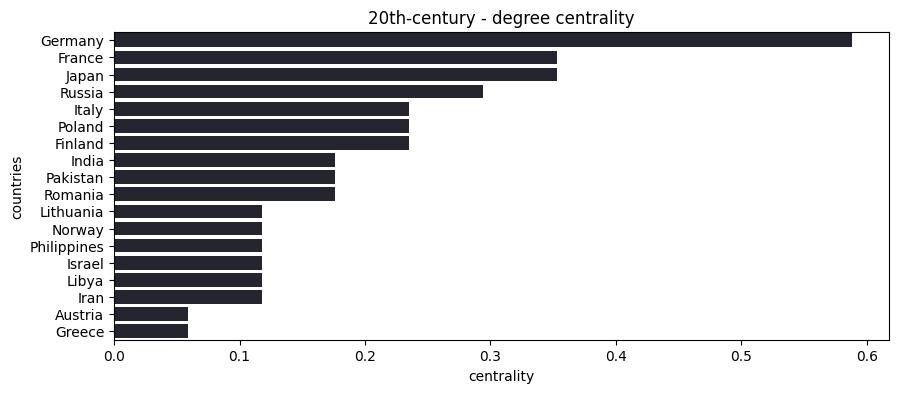

In [41]:
# Plot the degree centrality

plt.figure(figsize = (10, 4))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x = "centrality", y = "countries",
    saturation = 0.9, data = degree_df).set_title("20th-century - degree centrality")

# Closeness centrality

In [43]:
# Closeness centrality

closeness_dict = nx.closeness_centrality(G)
closeness_df = pd.DataFrame(closeness_dict.items(), columns=['countries','centrality'])

In [45]:
closeness_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

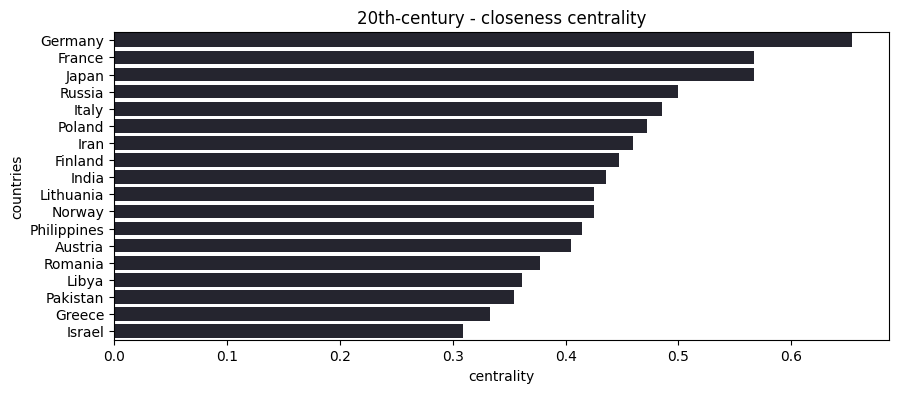

In [47]:
plt.figure(figsize = (10, 4))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x = "centrality", y = "countries",
    saturation = 0.9, data = closeness_df).set_title("20th-century - closeness centrality")

# Betweenness centrality

In [49]:
# Betweenness centrality

betweenness_dict = nx.betweenness_centrality(G)
betweennes_df = pd.DataFrame(betweenness_dict.items(), columns=['countries','centrality'])

In [51]:
betweennes_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

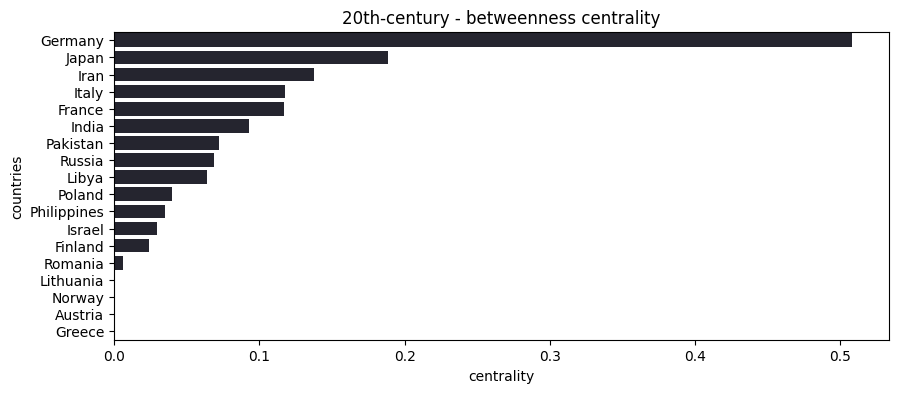

In [53]:
plt.figure(figsize = (10, 4))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x = "centrality", y = "countries",
    saturation = 0.9, data = betweennes_df).set_title("20th-century - betweenness centrality")

In [55]:
# Save centrality measures
nx.set_node_attributes(G, degree_dict, 'degree_centrality')
nx.set_node_attributes(G, betweenness_dict, 'betweenness_centrality')
nx.set_node_attributes(G, closeness_dict, 'closeness_centrality')

# Across all three centrality measures, Germany consistently ranks highest, reinforcing its critical role in 20th-century global affairs, both in Europe and globally. Its position as a central node in these networks reflects its influence and involvement in key historical events.